<a href="https://colab.research.google.com/github/Joaosbarros/ECON3916-Statistical-and-Machine-Learning/blob/main/Lab_2_FRED_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fredapi

In [4]:
!pip install fredapi

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='843c5cee31fe504553648dbb99ab5ec5')

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-06-01         31.26  321.500
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031


In [5]:
# 1. Fetch the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [6]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


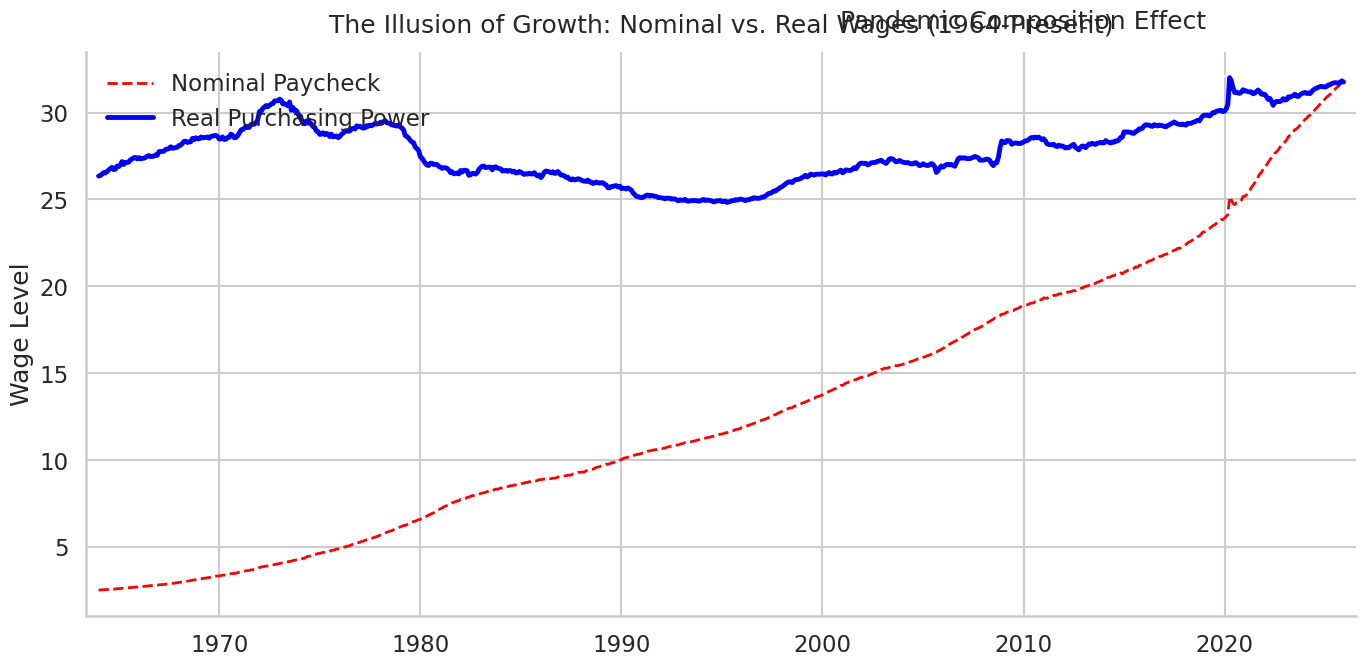

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Style
sns.set_theme(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(14, 7))

# Lines
ax.plot(
    df.index, df["Nominal_Wage"],
    linestyle="--", linewidth=2,
    color="red", label="Nominal Paycheck"
)

ax.plot(
    df.index, df["Real_Wage"],
    linestyle="-", linewidth=3.5,
    color="blue", label="Real Purchasing Power"
)

# Title + labels
ax.set_title("The Illusion of Growth: Nominal vs. Real Wages (1964-Present)", pad=14)
ax.set_xlabel("")
ax.set_ylabel("Wage Level")

# --- Annotation: 2020 spike in Real Wages ---
# Ensure DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    raise TypeError("df.index must be a pandas DatetimeIndex.")

# Find the max Real_Wage within 2020 (handles daily/monthly/quarterly data)
real_2020 = df.loc["2020", "Real_Wage"].dropna()
if real_2020.empty:
    raise ValueError("No Real_Wage data found for 2020 to annotate.")

peak_date = real_2020.idxmax()
peak_value = real_2020.loc[peak_date]

# Place annotation text a bit up-left of the peak (tweak multipliers if needed)
ax.annotate(
    "Pandemic Composition Effect",
    xy=(peak_date, peak_value),
    xytext=(peak_date - pd.DateOffset(months=14), peak_value * 1.08),
    arrowprops=dict(arrowstyle="->", lw=2),
    ha="right", va="bottom"
)

# Finishing touches
ax.legend(frameon=False, loc="upper left")
ax.margins(x=0.01)
sns.despine()

plt.tight_layout()
plt.show()

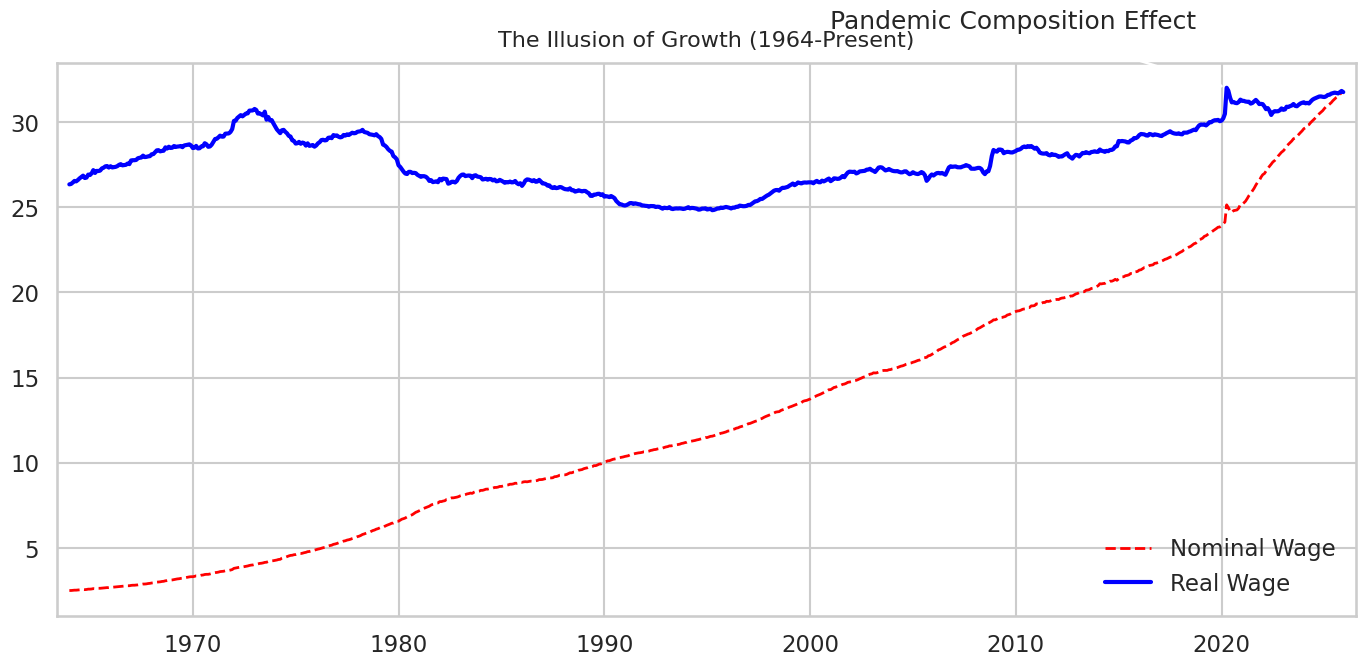

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot lines
ax.plot(
    df.index,
    df["Nominal_Wage"],
    linestyle="--",
    color="red",
    linewidth=2,
    label="Nominal Wage"
)

ax.plot(
    df.index,
    df["Real_Wage"],
    linestyle="-",
    color="blue",
    linewidth=3,
    label="Real Wage"
)

# Title
ax.set_title("The Illusion of Growth (1964-Present)", fontsize=16, pad=12)

# Annotation for 2020 spike
# (works for daily, monthly, or quarterly data as long as index is DatetimeIndex)
if not isinstance(df.index, pd.DatetimeIndex):
    raise TypeError("df.index must be a pandas DatetimeIndex.")

real_2020 = df.loc["2020", "Real_Wage"].dropna()
if real_2020.empty:
    raise ValueError("No Real_Wage data available for 2020.")

peak_date = real_2020.idxmax()
peak_value = real_2020.loc[peak_date]

ax.annotate(
    "Pandemic Composition Effect",
    xy=(peak_date, peak_value),
    xytext=(peak_date - pd.DateOffset(months=18), peak_value * 1.1),
    arrowprops=dict(arrowstyle="->", linewidth=1.8),
    ha="right",
    va="bottom"
)

# Legend and layout
ax.legend(frameon=False)
ax.margins(x=0.01)
plt.tight_layout()
plt.show()

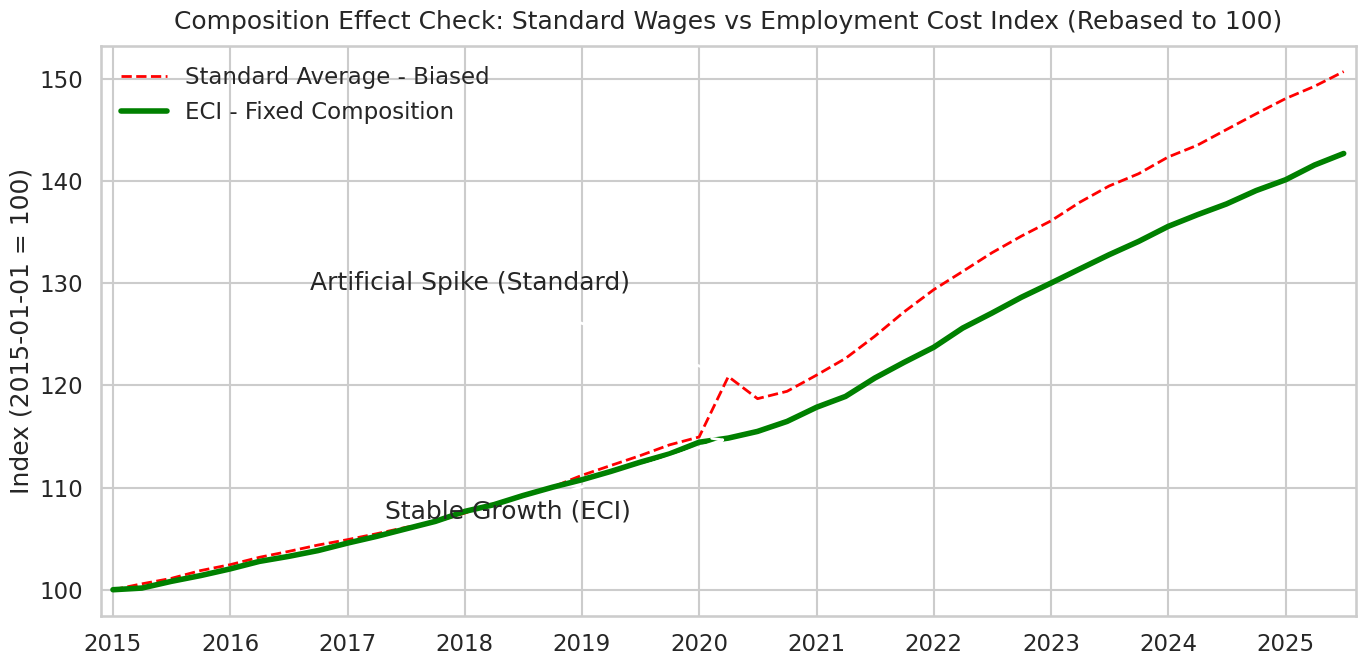

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Fetch ECI wages series from FRED (assumes you already have: fred = Fred(api_key=...))
eci = fred.get_series("ECIWAG")  # Employment Cost Index: Wages and salaries (private industry)
eci.index = pd.to_datetime(eci.index)
eci = eci.sort_index()

# Ensure wages is a Series with a DatetimeIndex
wages = wages.copy()
wages.index = pd.to_datetime(wages.index)
wages = wages.sort_index()

# 2) Filter both to 2015-01-01 onwards
start = "2015-01-01"
w_2015 = wages.loc[start:].dropna()
eci_2015 = eci.loc[start:].dropna()

# Align to common dates (important if frequencies differ)
common_idx = w_2015.index.intersection(eci_2015.index)
w_2015 = w_2015.loc[common_idx]
eci_2015 = eci_2015.loc[common_idx]

if w_2015.empty or eci_2015.empty:
    raise ValueError("After filtering/alignment, one of the series is empty. Check date ranges and frequencies.")

# 3) Rebase both to 100
w_idx = (w_2015 / w_2015.iloc[0]) * 100
eci_idx = (eci_2015 / eci_2015.iloc[0]) * 100

# 4) Plot
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(w_idx.index, w_idx.values,
        linestyle="--", color="red", linewidth=2,
        label="Standard Average - Biased")

ax.plot(eci_idx.index, eci_idx.values,
        linestyle="-", color="green", linewidth=4,
        label="ECI - Fixed Composition")

ax.set_title("Composition Effect Check: Standard Wages vs Employment Cost Index (Rebased to 100)", pad=12)
ax.set_ylabel("Index (2015-01-01 = 100)")
ax.legend(frameon=False)
ax.margins(x=0.01)

# 5) Annotate divergence in 2020
# Find the 2020 point where the gap (biased - ECI) is largest
gap_2020 = (w_idx - eci_idx).loc["2020":].dropna()
gap_2020 = gap_2020.loc[gap_2020.index.year == 2020]

if not gap_2020.empty:
    peak_date = gap_2020.idxmax()

    ax.annotate(
        "Artificial Spike (Standard)",
        xy=(peak_date, w_idx.loc[peak_date]),
        xytext=(peak_date - pd.DateOffset(months=10), w_idx.loc[peak_date] + 8),
        arrowprops=dict(arrowstyle="->", lw=2),
        ha="right", va="bottom"
    )

    ax.annotate(
        "Stable Growth (ECI)",
        xy=(peak_date, eci_idx.loc[peak_date]),
        xytext=(peak_date - pd.DateOffset(months=10), eci_idx.loc[peak_date] - 6),
        arrowprops=dict(arrowstyle="->", lw=2),
        ha="right", va="top"
    )
else:
    # Fallback: annotate at the max wages point in 2020 if gap can't be computed cleanly
    w_2020 = w_idx.loc["2020"].dropna()
    if not w_2020.empty:
        peak_date = w_2020.idxmax()
        ax.annotate(
            "2020 divergence",
            xy=(peak_date, w_idx.loc[peak_date]),
            xytext=(peak_date - pd.DateOffset(months=10), w_idx.loc[peak_date] + 8),
            arrowprops=dict(arrowstyle="->", lw=2),
            ha="right", va="bottom"
        )

plt.tight_layout()
plt.show()